In [2]:
import io
import sys
from datetime import datetime
from Chain.Manager import Manager
import random, numpy
import Chain.Consensus.BigFoot.BigFoot as BigFoot
import Chain.Consensus.PBFT.PBFT as PBFT
from Chain.Metrics import SimulationState, Metrics

# Set the seed for random number generation
seed = 5
random.seed(seed)
numpy.random.seed(seed)

def run():
    # Create a Manager object and set up the simulation
    manager = Manager()
    manager.set_up()

    # Start the simulation and measure the runtime
    t = datetime.now()
    print("Simulation started...")
    manager.run()
    runtime = datetime.now() - t
    print("Simulation finished.")

    # Open a text file for writing the report
    with open('simulation_report.txt', 'w') as report_file:
        print("Writing report...")

        # Write the simulation timestamp and runtime to the report
        report_file.write(f"Simulation Timestamp: {datetime.now()}\n")
        report_file.write(f"Simulation Execution Time: {runtime}\n\n")

        # Write information about each node to the report
        for n in manager.sim.nodes:
            report_file.write(f"Node: {n}\n")
            report_file.write(f"Validator: {n.validator}\n")
            report_file.write(f"Total Blocks: {n.blockchain_length()}\n")
            report_file.write(f"PBFT Blocks: {len([x for x in n.blockchain if x.consensus == PBFT])}\n")
            report_file.write(f"BigFoot Blocks: {len([x for x in n.blockchain if x.consensus == BigFoot])}\n")
            report_file.write(f'Node {n} is at location {n.location} and has {len(n.neighbours)} neighbours at locations \n {[neighbour.location for neighbour in n.neighbours]}\n')
        # Store the simulation state and measure the metrics
        SimulationState.store_state(manager.sim)
        Metrics.measure_all(SimulationState.blockchain_state)

        # Redirect stdout to a string buffer, print the metrics, and then reset stdout
        old_stdout = sys.stdout
        sys.stdout = buffer = io.StringIO()
        Metrics.print_metrics()
        sys.stdout = old_stdout

        # Write the metrics to the report
        report_file.write("\nMetrics:\n")
        report_file.write(buffer.getvalue())

    print("Report written to simulation_report.txt")

run()




#### Something needs to notice: Reload or Restart Kernel: If you've recently added the modify method to the Manager class but are running this in an interactive environment (like Jupyter Notebook), you might need to restart the kernel or reload the module to reflect the changes. 

Simulation started...


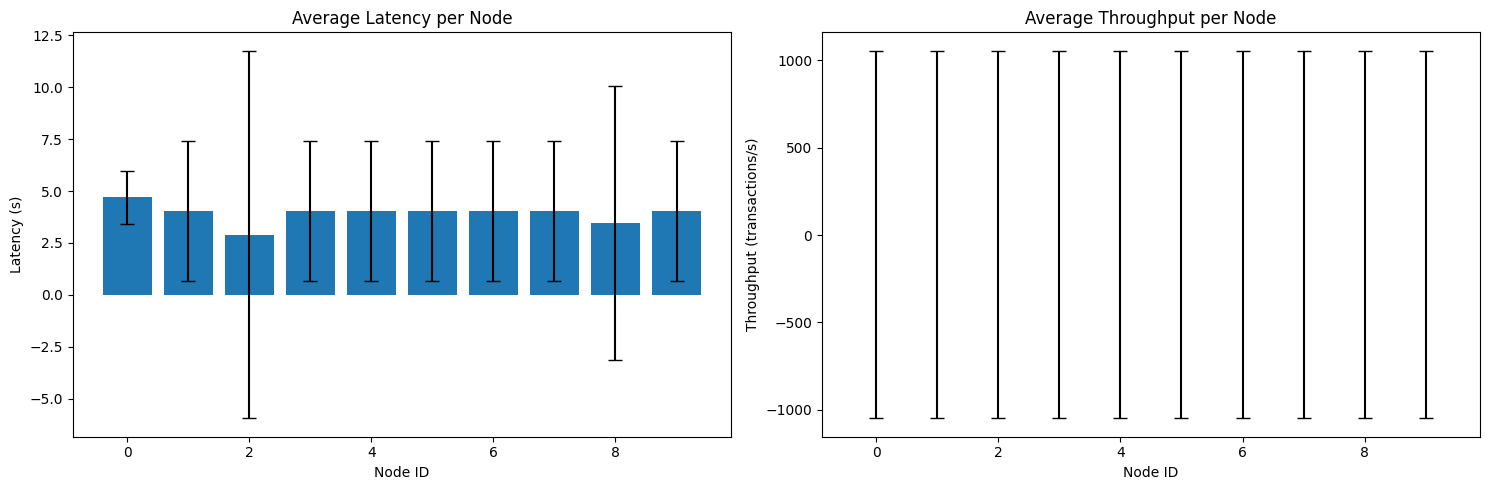

Simulation finished.
Writing report...
Report written to simulation_report.txt


({0: {'values': {215: 4.205150316815962,
    5079: 4.56771939479879,
    6018: 5.893888824850207,
    8932: 3.1075769587130164,
    8087: 5.662583666005652},
   'AVG': 4.687383832236725},
  1: {'values': {215: 7.052566963746421,
    5079: 4.567721937448923,
    6018: 2.631457025145729,
    8932: 3.1075782573784068,
    8087: 2.910148257378406},
   'AVG': 4.053894488219577},
  2: {'values': {215: 7.052566,
    5079: 4.567718513073341,
    6018: 2.631452787395509,
    8932: 0.10514191918014504,
    8087: 0.15771191918014438},
   'AVG': 2.902918227765828},
  3: {'values': {215: 7.052566963746421,
    5079: 4.56772178707714,
    6018: 2.631457059321135,
    8932: 3.1075781685223536,
    8087: 2.910148168522353},
   'AVG': 4.0538944294378805},
  4: {'values': {215: 7.0525669090657725,
    5079: 4.567718588259233,
    6018: 2.631454468825436,
    8932: 3.1075770475690696,
    8087: 2.910147047569069},
   'AVG': 4.053892812257716},
  5: {'values': {215: 7.052566997921826,
    5079: 4.56771851

In [5]:
import io
import sys
from datetime import datetime
from Chain.Manager import Manager
import random, numpy
import Chain.Consensus.BigFoot.BigFoot as BigFoot
import Chain.Consensus.PBFT.PBFT as PBFT
from Chain.Metrics import SimulationState, Metrics


# Set the seed for random number generation
seed = 5
random.seed(seed)
numpy.random.seed(seed)

def run1(Node=10, Validator=0.1, Protocol='PBFT', Runtime=100):
    """
    Runs the simulation with the given parameters.

    Parameters:
    Node (int): The number of nodes in the simulation.
    Validator (float): The probability of a node being a validator.
    Protocol (str): The consensus protocol to use ('BigFoot' or 'PBFT').
    Runtime (int): The runtime of the simulation in seconds.

    Returns:
    None
    """

    # Create a Manager object and set up the simulation
    manager = Manager()
    manager.set_up()

    # Use the modify method to set the parameters
    manager.modify('Nn', Node)
    manager.modify('alpha', Validator)
    manager.modify('init_CP', Protocol)
    manager.modify('simTime', Runtime)

    # Start the simulation and measure the runtime
    t = datetime.now()
    print("Simulation started...")
    manager.run()
    runtime = datetime.now() - t
    print("Simulation finished.")
    # Open a text file for writing the report
    with open('simulation_report.txt', 'w') as report_file:
        print("Writing report...")

        # Write the simulation timestamp and runtime to the report
        report_file.write(f"Simulation Timestamp: {datetime.now()}\n")
        report_file.write(f"Simulation Execution Time: {runtime}\n\n")

        # Write information about each node to the report
        for n in manager.sim.nodes:
            report_file.write(f"Node: {n}\n")
            report_file.write(f"Validator: {n.validator}\n")
            report_file.write(f"Total Blocks: {n.blockchain_length()}\n")
            report_file.write(f"PBFT Blocks: {len([x for x in n.blockchain if x.consensus == PBFT])}\n")
            report_file.write(f"BigFoot Blocks: {len([x for x in n.blockchain if x.consensus == BigFoot])}\n")
            report_file.write(f'Node {n} is at location {n.location} and has {len(n.neighbours)} neighbours at locations \n {[neighbour.location for neighbour in n.neighbours]}\n')
        # Store the simulation state and measure the metrics
        SimulationState.store_state(manager.sim)
        Metrics.measure_all(SimulationState.blockchain_state)

        # Redirect stdout to a string buffer, print the metrics, and then reset stdout
        old_stdout = sys.stdout
        sys.stdout = buffer = io.StringIO()
        Metrics.print_metrics()
        Metrics.plot_metrics(SimulationState.blockchain_state)
        sys.stdout = old_stdout

        # Write the metrics to the report
        report_file.write("\nMetrics:\n")
        report_file.write(buffer.getvalue())

    print("Report written to simulation_report.txt")
        # Return some metrics
    return Metrics.measure_all(SimulationState.blockchain_state)
    


run1()




### Attempts

Runtime: 2000, Node: 3, Validator: 0.3, Protocol: PBFT
Simulation started...


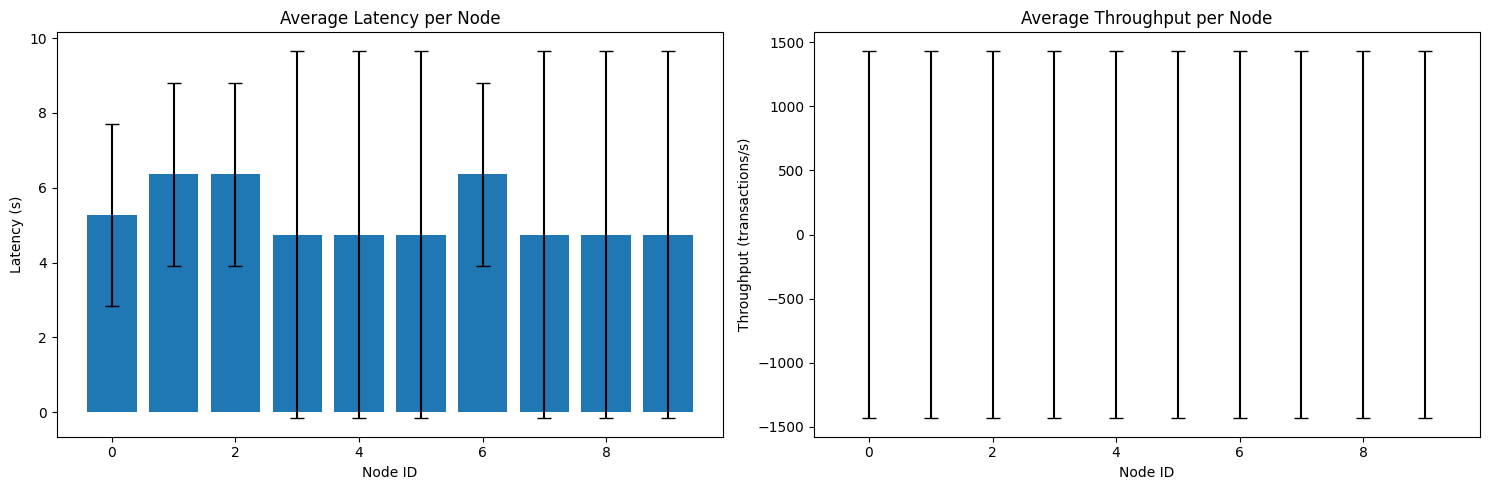

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 3, Validator: 0.3, Protocol: PBFT
Simulation started...


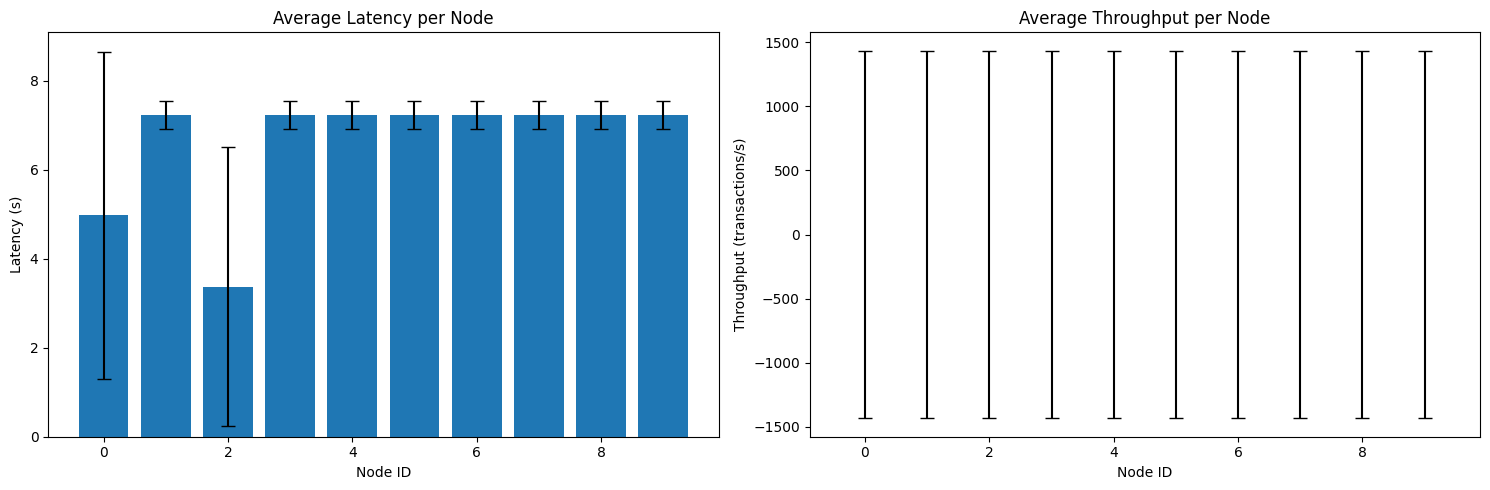

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 3, Validator: 0.3, Protocol: PBFT
Simulation started...


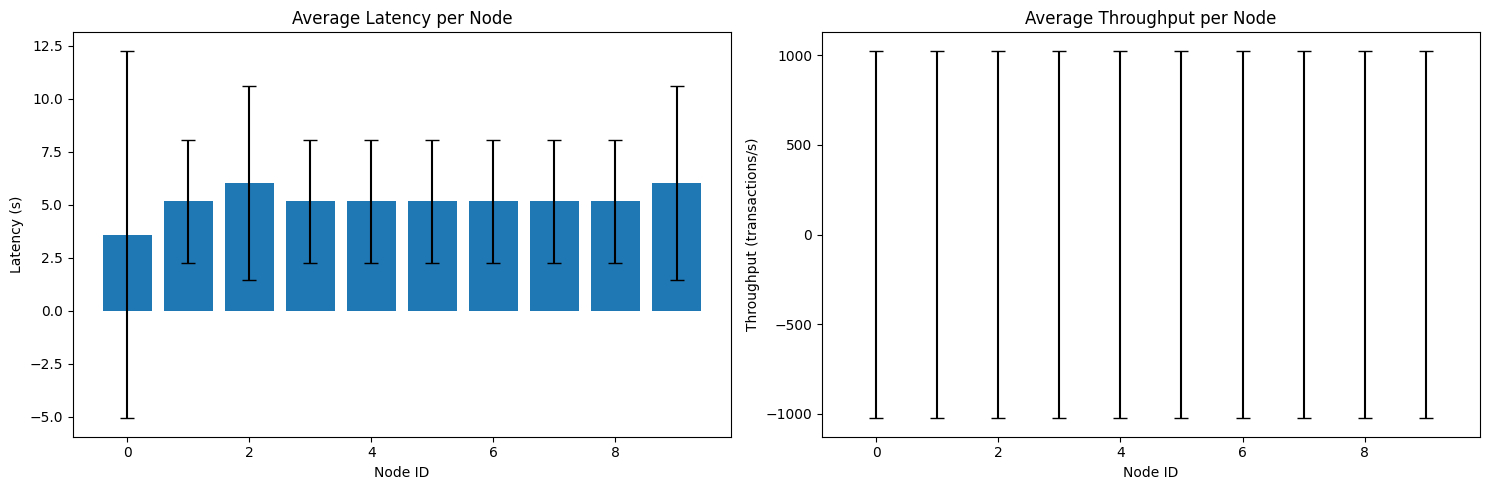

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 3, Validator: 0.3, Protocol: BigFoot
Simulation started...


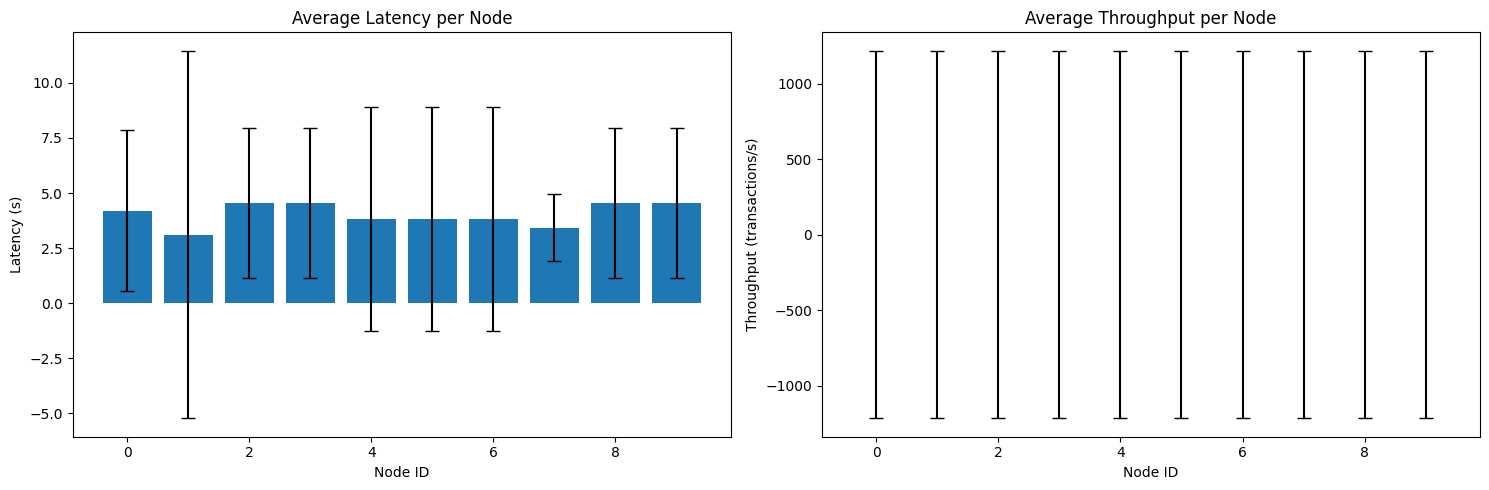

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 3, Validator: 0.3, Protocol: BigFoot
Simulation started...


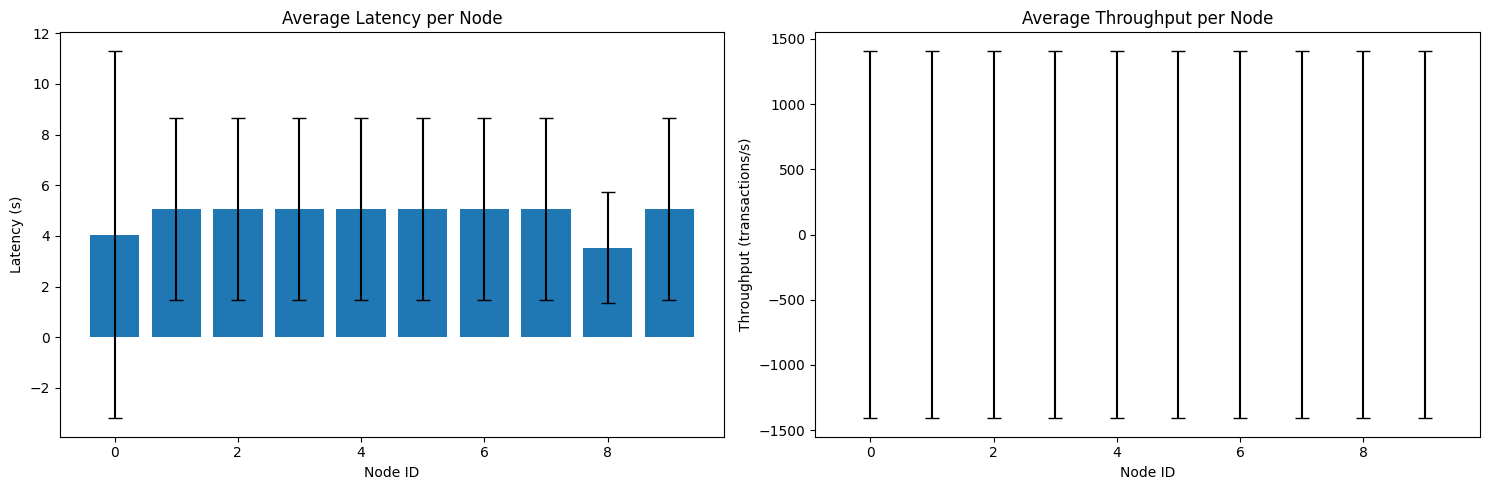

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 3, Validator: 0.3, Protocol: BigFoot
Simulation started...


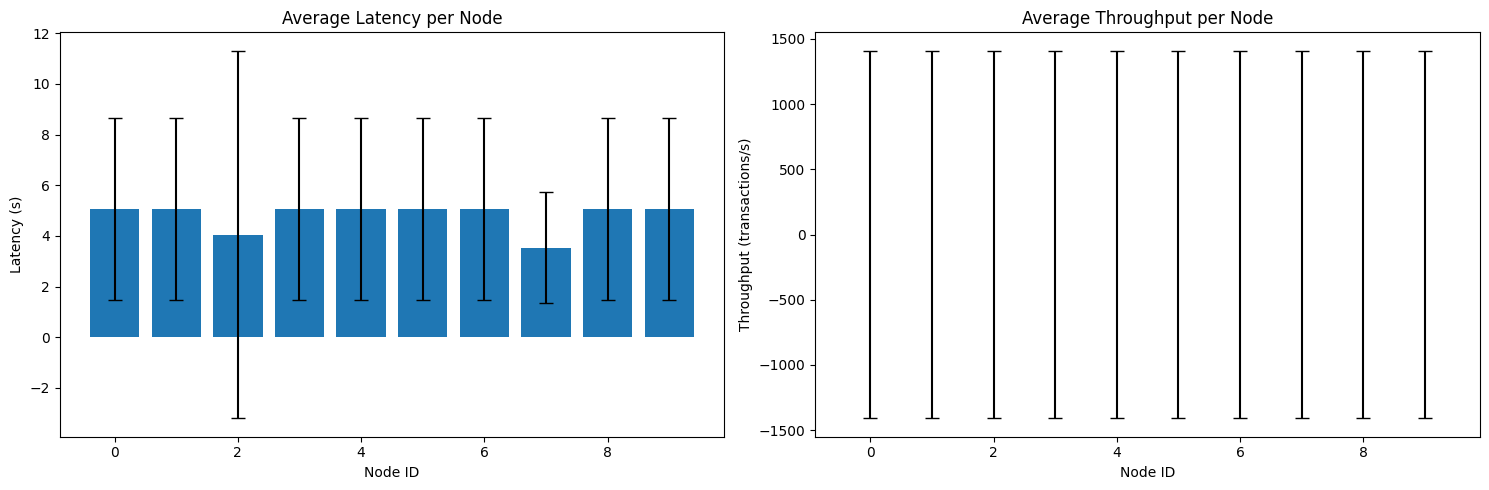

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 3, Validator: 0.6, Protocol: PBFT
Simulation started...


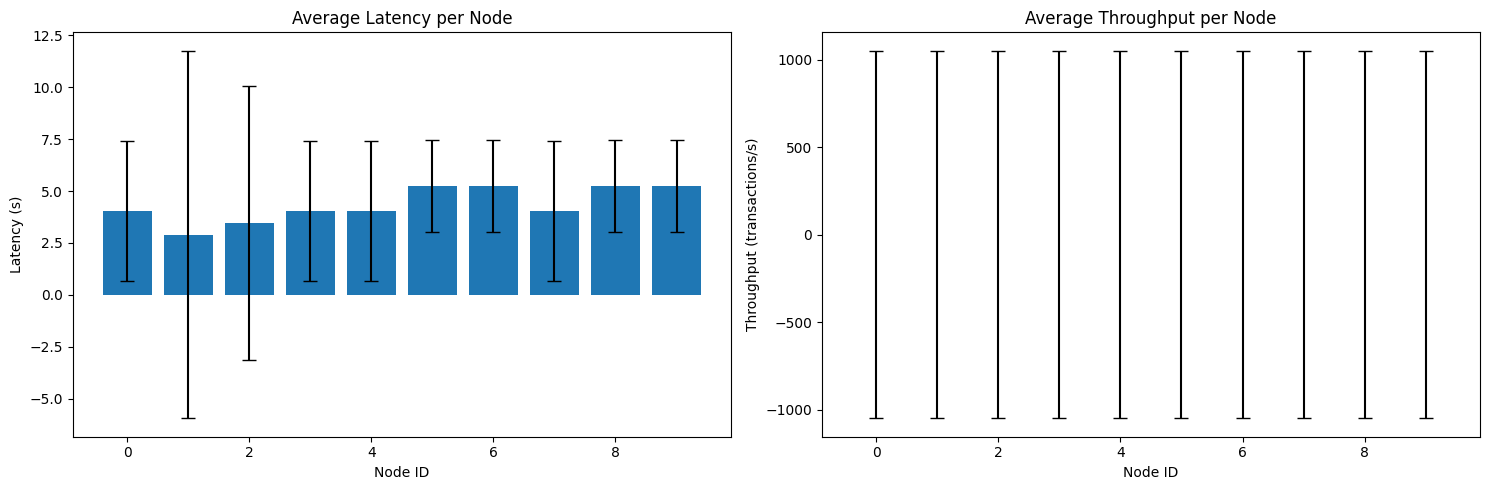

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 3, Validator: 0.6, Protocol: PBFT
Simulation started...


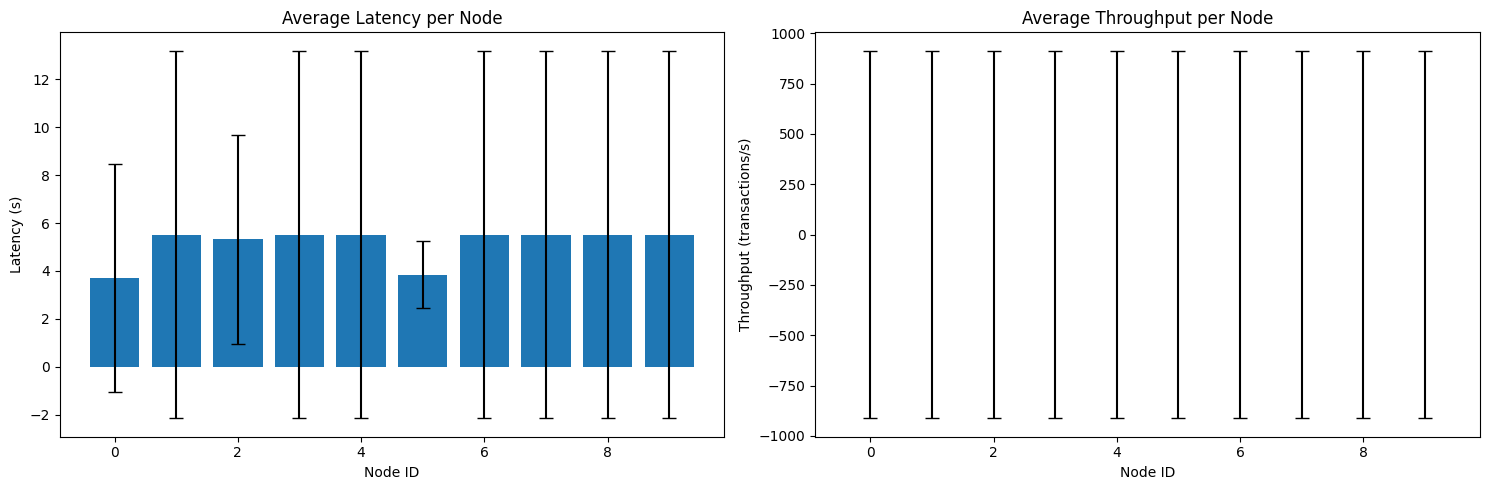

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 3, Validator: 0.6, Protocol: PBFT
Simulation started...


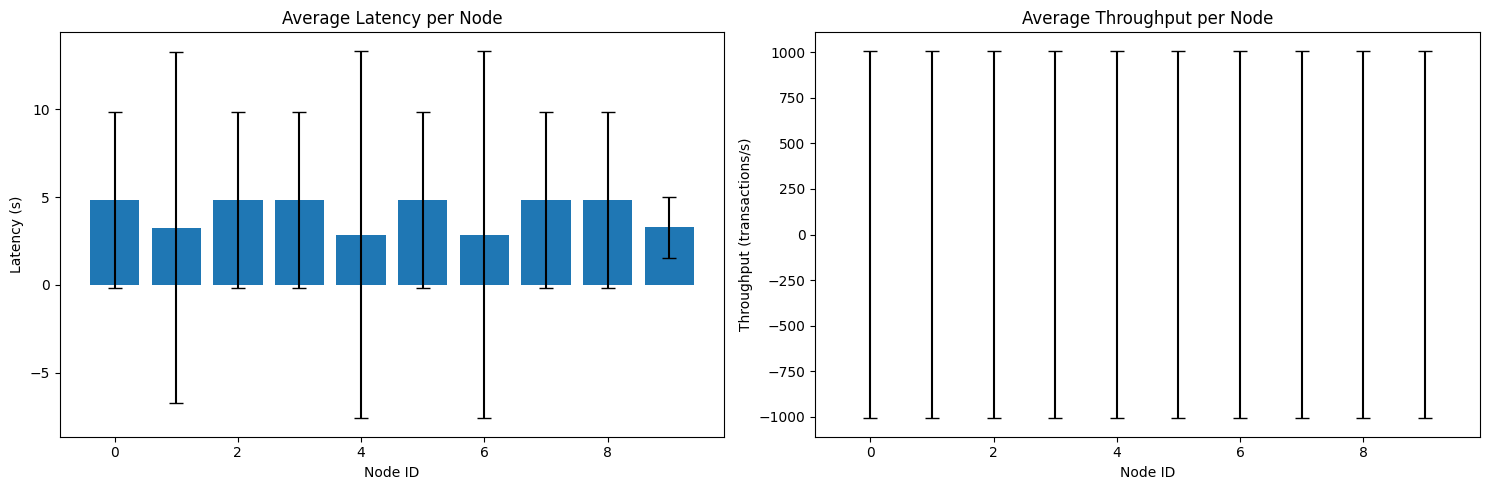

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 3, Validator: 0.6, Protocol: BigFoot
Simulation started...
Simulation finished.
Writing report...


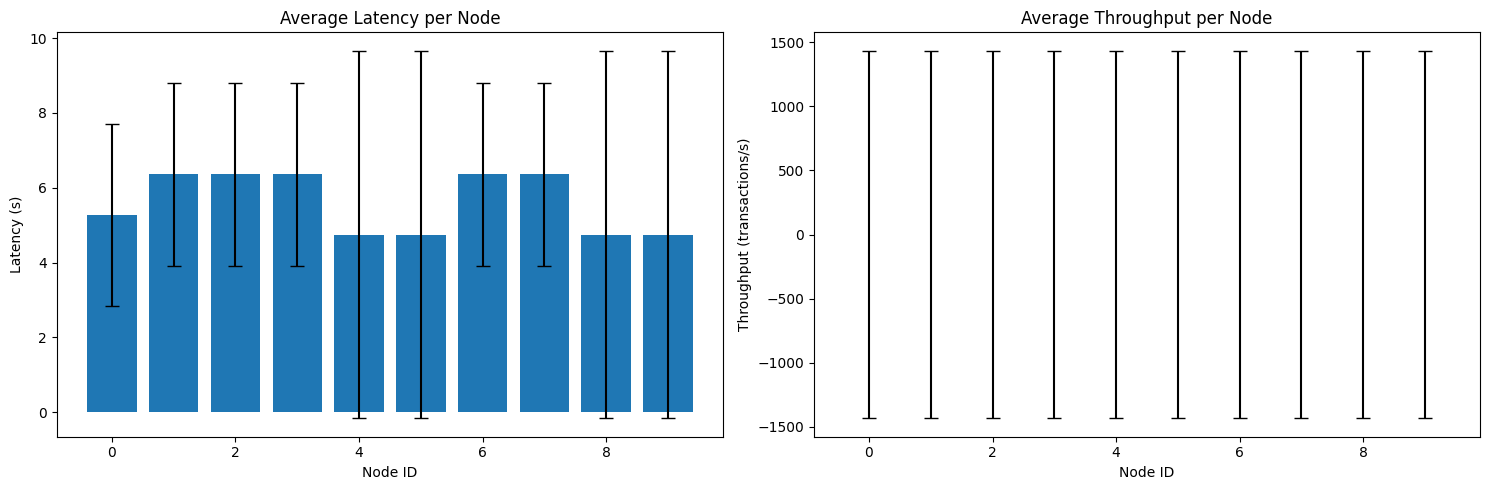

Report written to simulation_report.txt
Runtime: 3000, Node: 3, Validator: 0.6, Protocol: BigFoot
Simulation started...


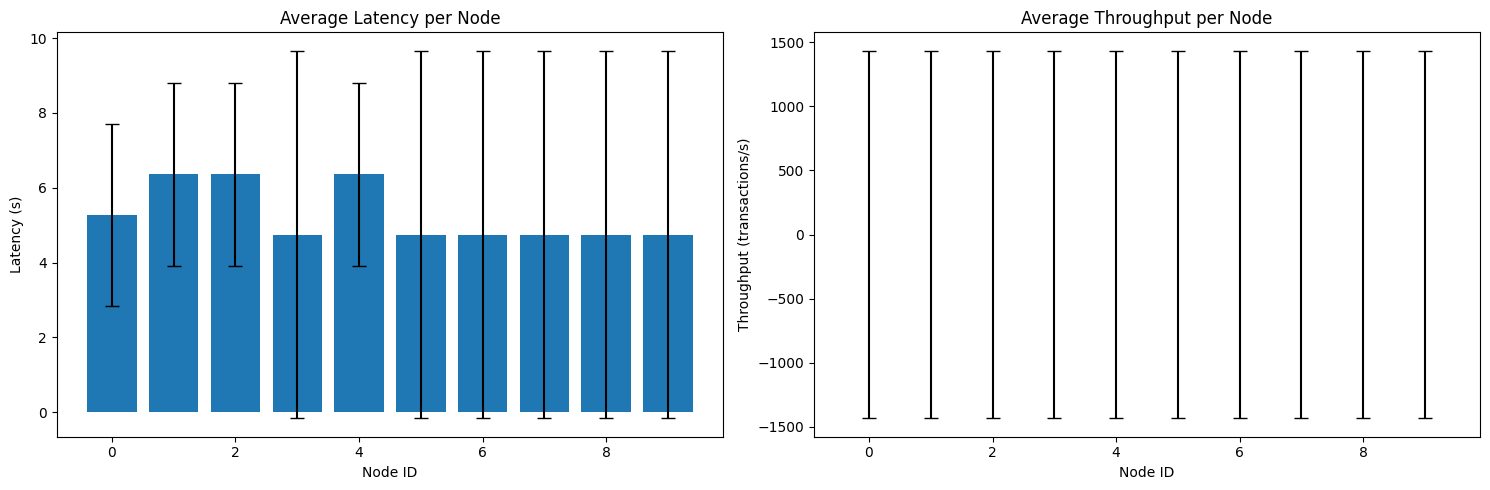

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 3, Validator: 0.6, Protocol: BigFoot
Simulation started...
Simulation finished.
Writing report...


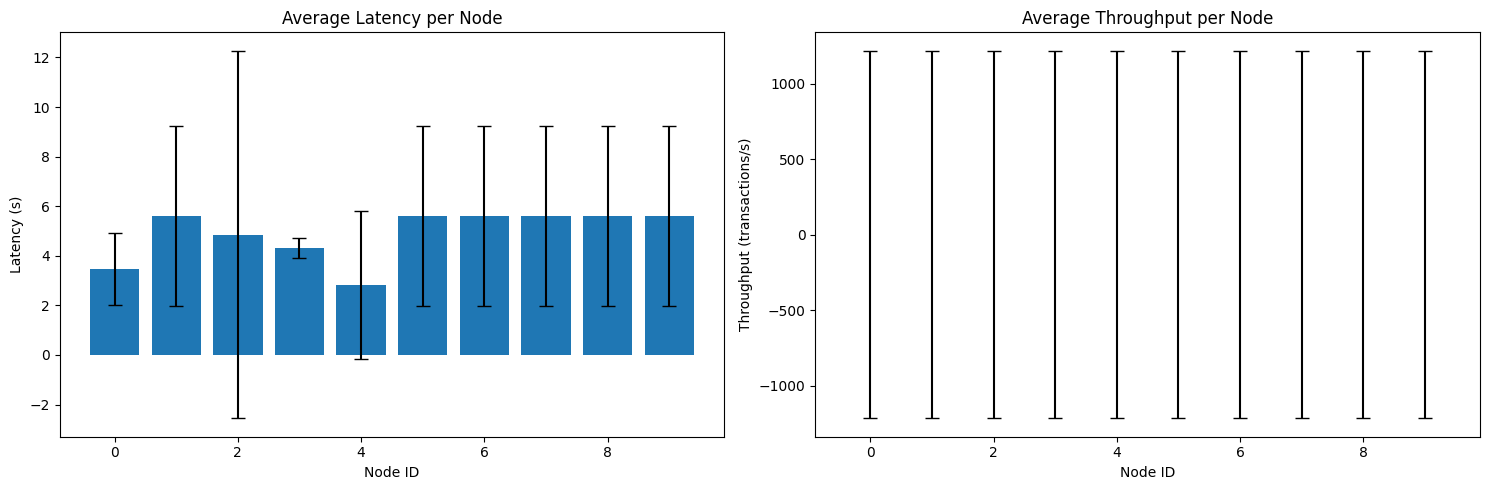

Report written to simulation_report.txt
Runtime: 2000, Node: 3, Validator: 0.9, Protocol: PBFT
Simulation started...


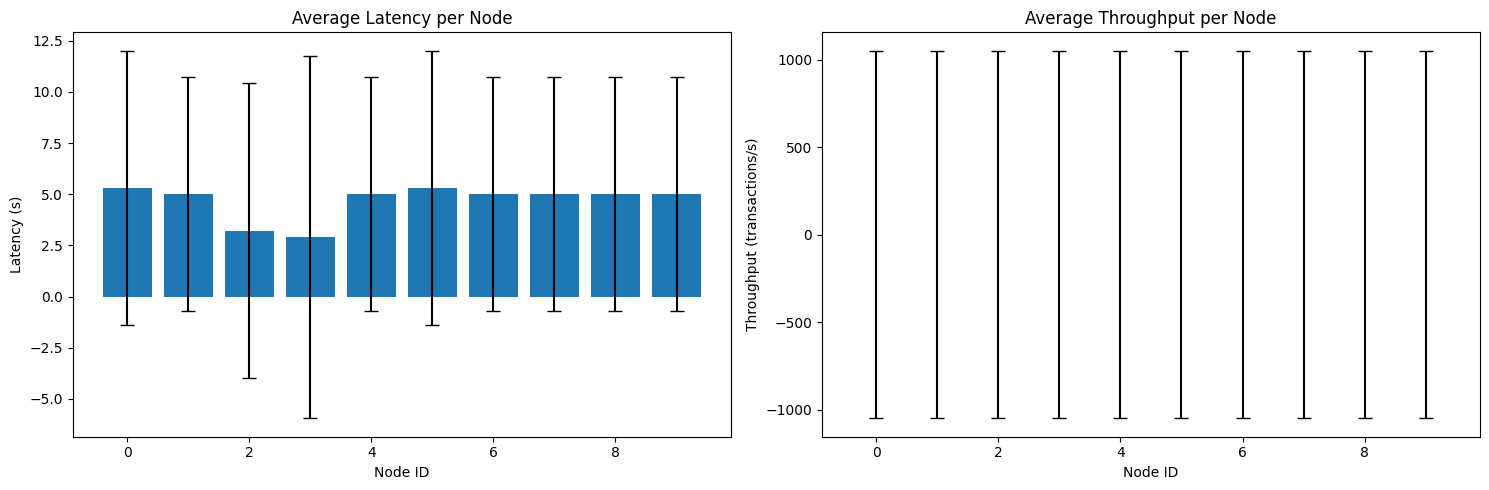

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 3, Validator: 0.9, Protocol: PBFT
Simulation started...


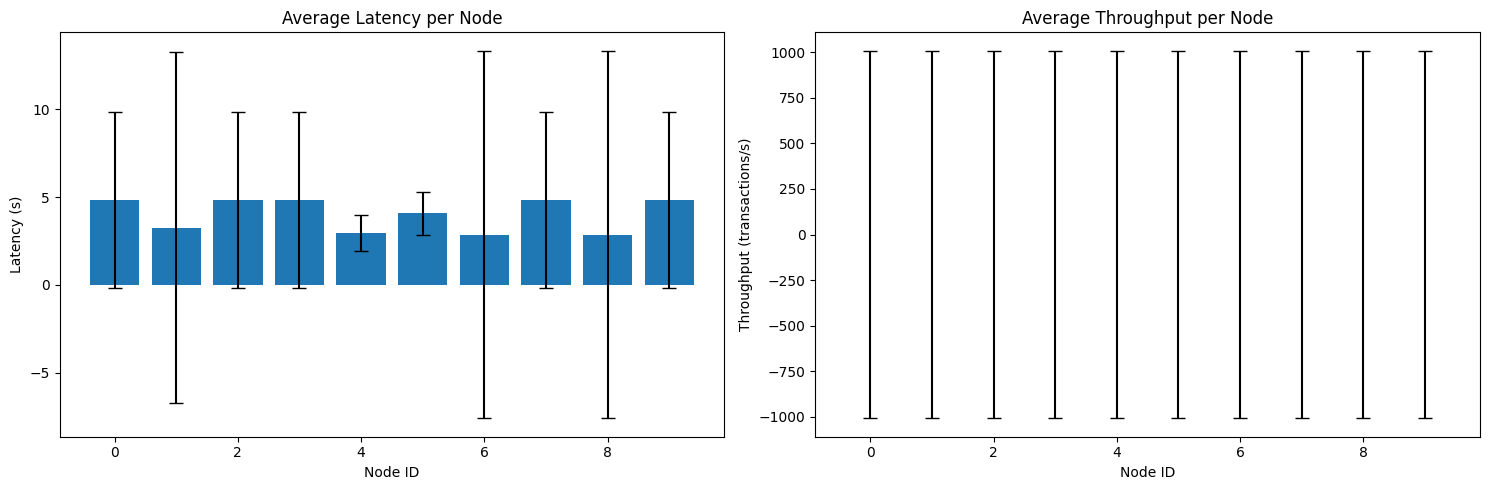

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 3, Validator: 0.9, Protocol: PBFT
Simulation started...
Simulation finished.
Writing report...


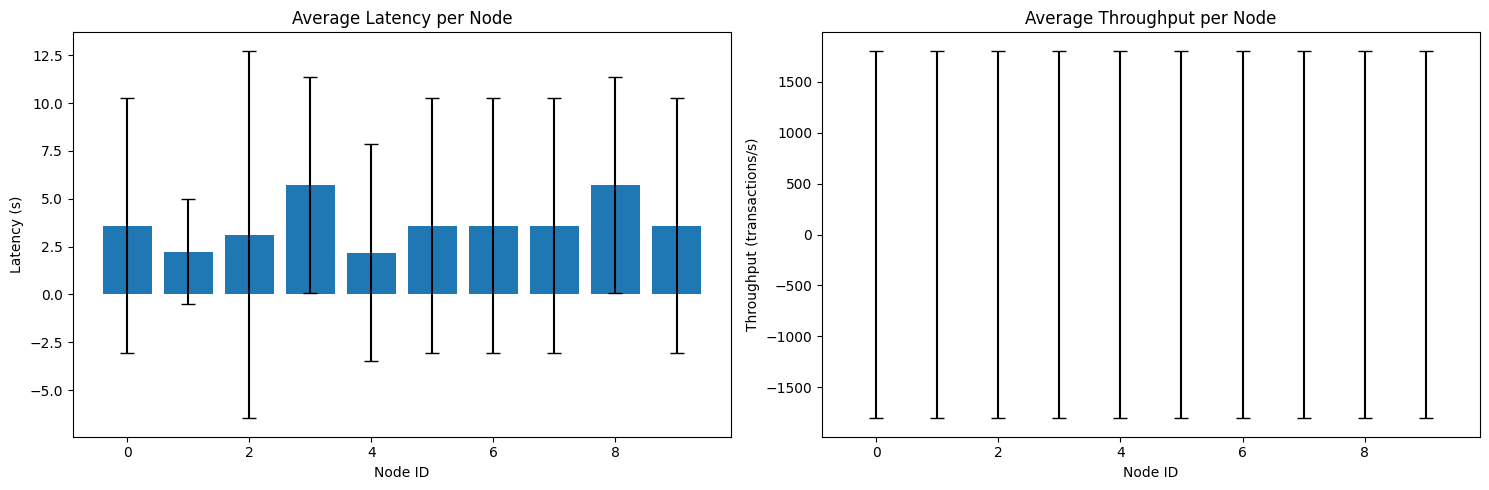

Report written to simulation_report.txt
Runtime: 2000, Node: 3, Validator: 0.9, Protocol: BigFoot
Simulation started...


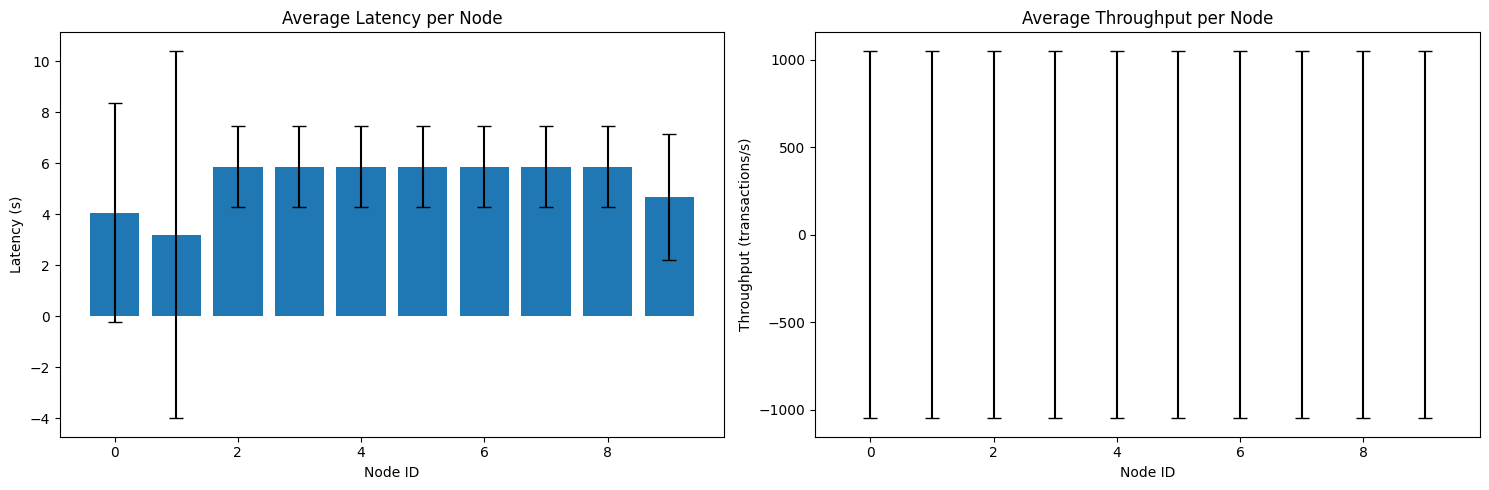

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 3, Validator: 0.9, Protocol: BigFoot
Simulation started...


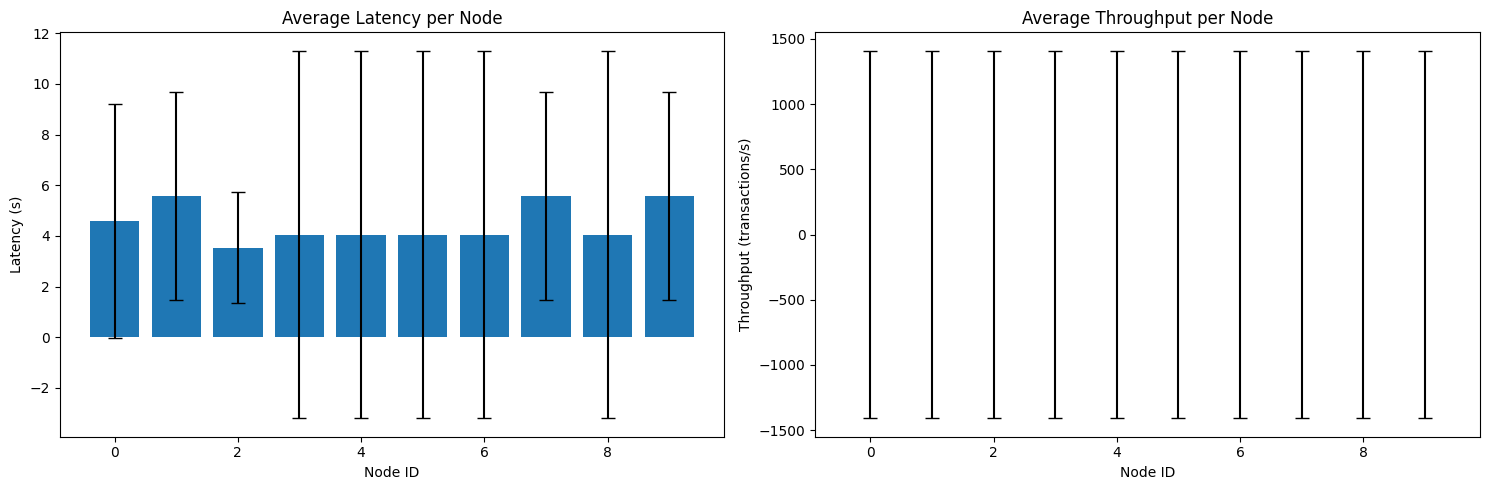

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 3, Validator: 0.9, Protocol: BigFoot
Simulation started...


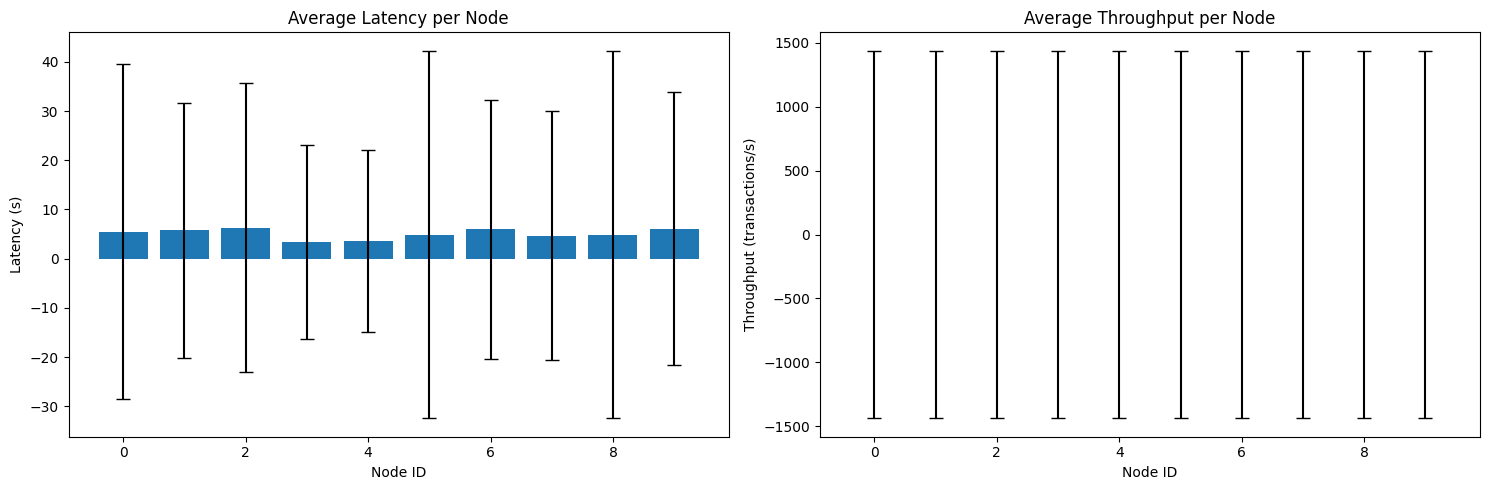

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 6, Validator: 0.3, Protocol: PBFT
Simulation started...


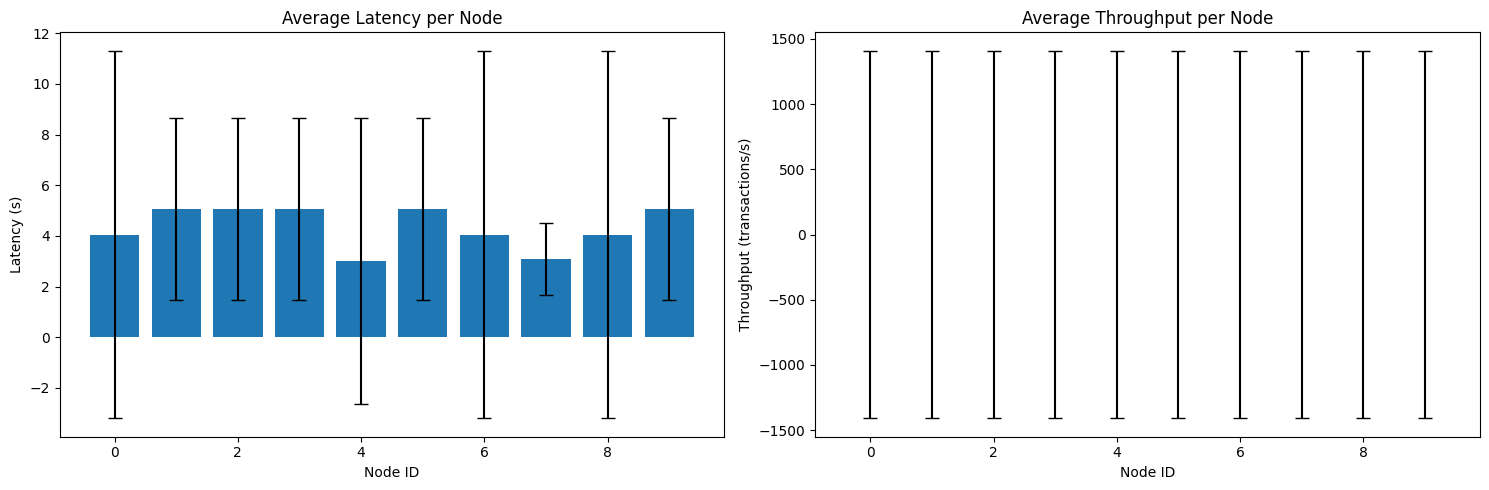

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 6, Validator: 0.3, Protocol: PBFT
Simulation started...
Simulation finished.
Writing report...


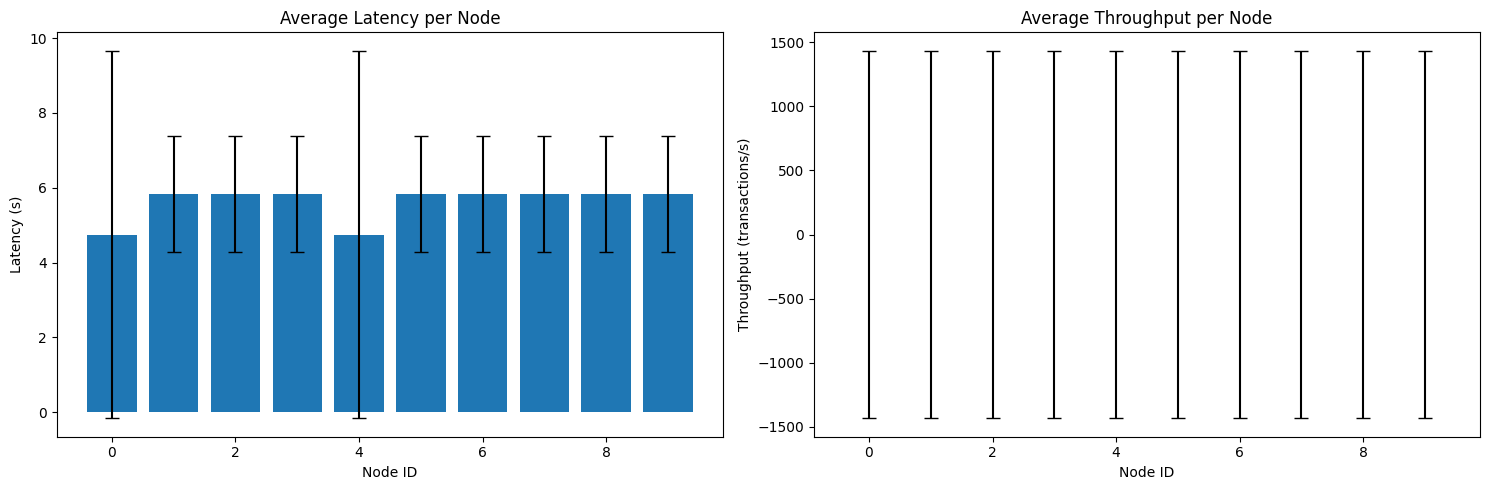

Report written to simulation_report.txt
Runtime: 4000, Node: 6, Validator: 0.3, Protocol: PBFT
Simulation started...


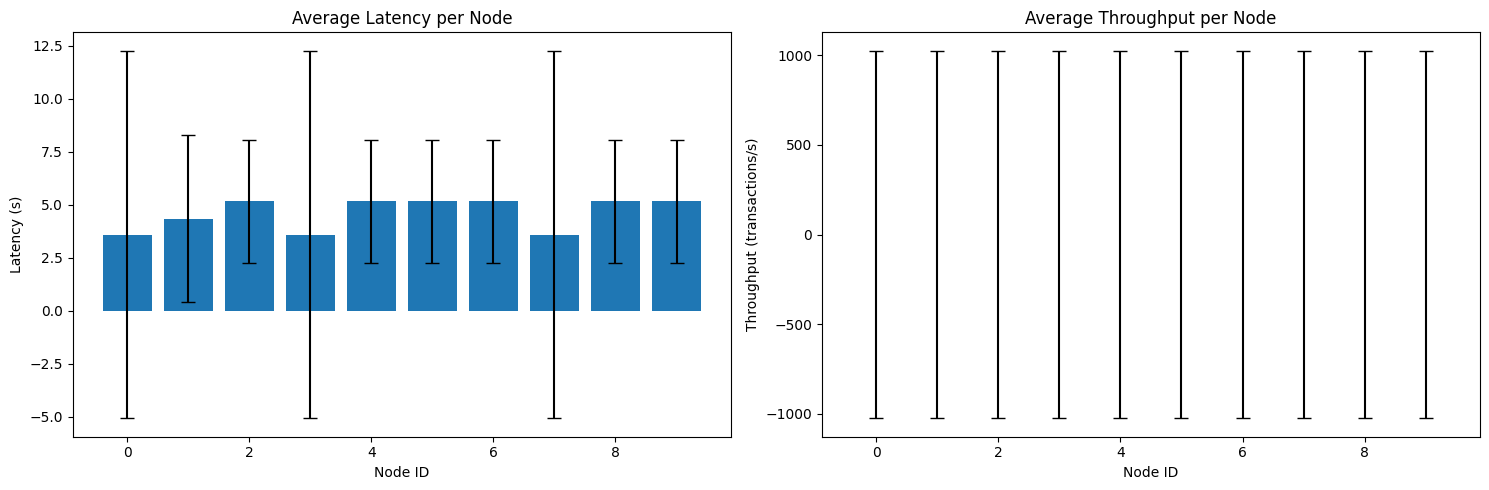

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 6, Validator: 0.3, Protocol: BigFoot
Simulation started...


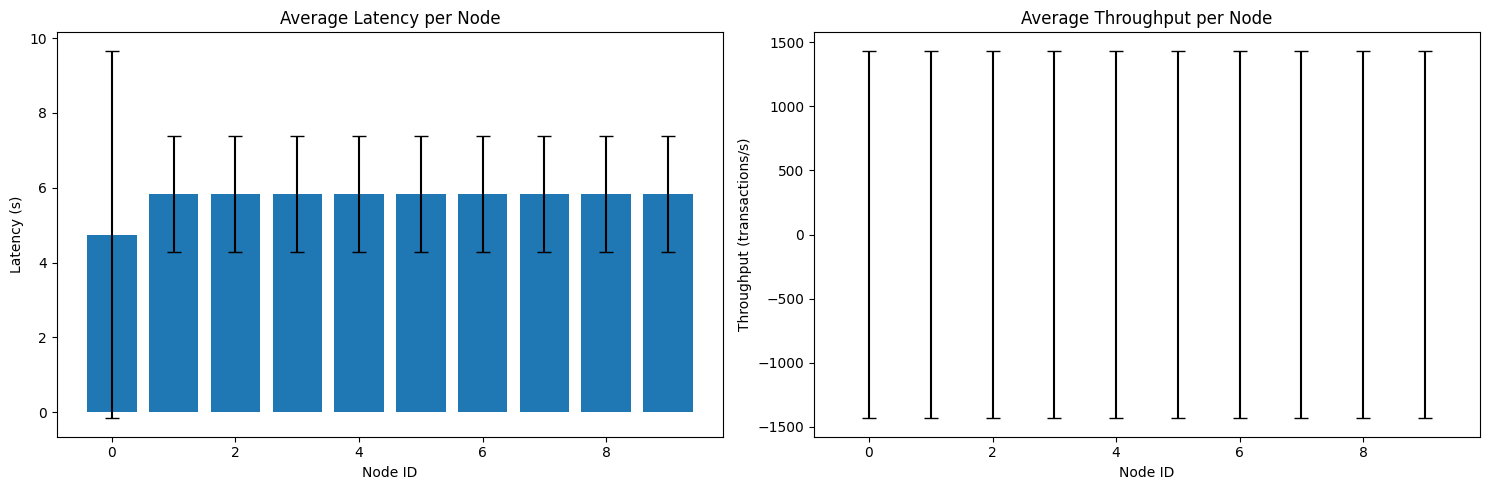

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 6, Validator: 0.3, Protocol: BigFoot
Simulation started...


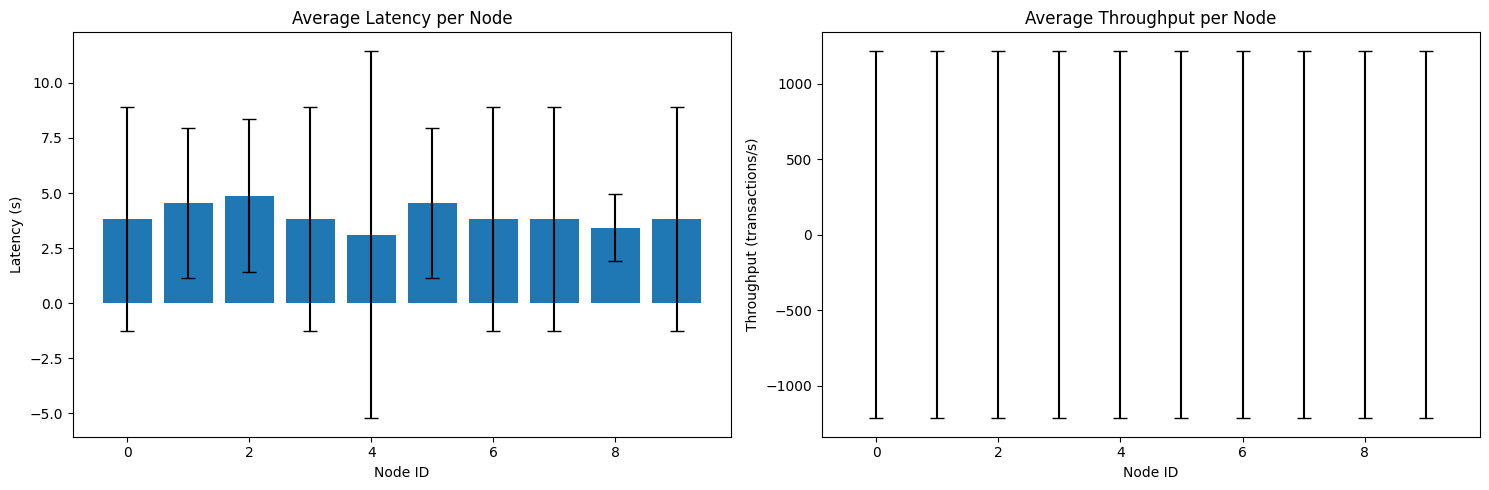

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 6, Validator: 0.3, Protocol: BigFoot
Simulation started...


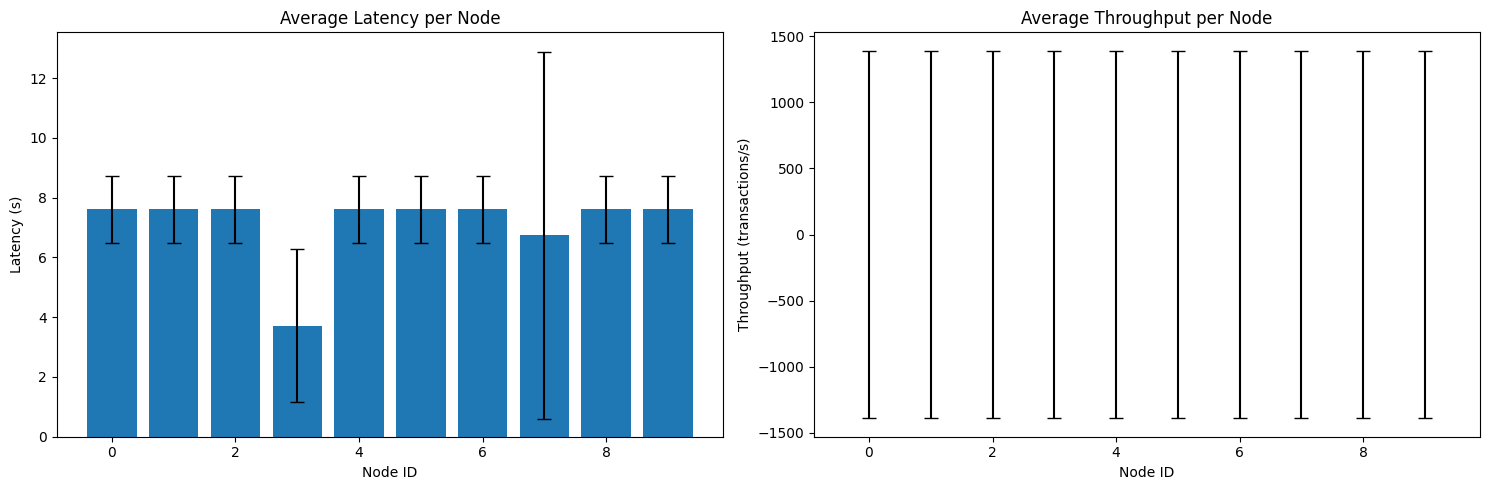

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 6, Validator: 0.6, Protocol: PBFT
Simulation started...


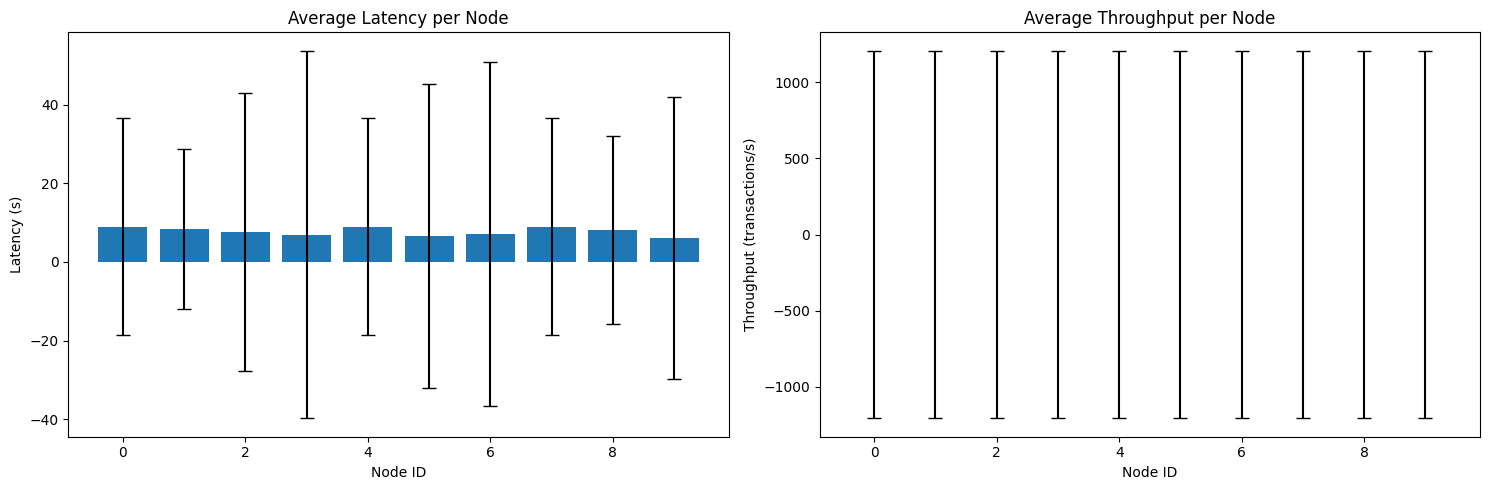

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 6, Validator: 0.6, Protocol: PBFT
Simulation started...


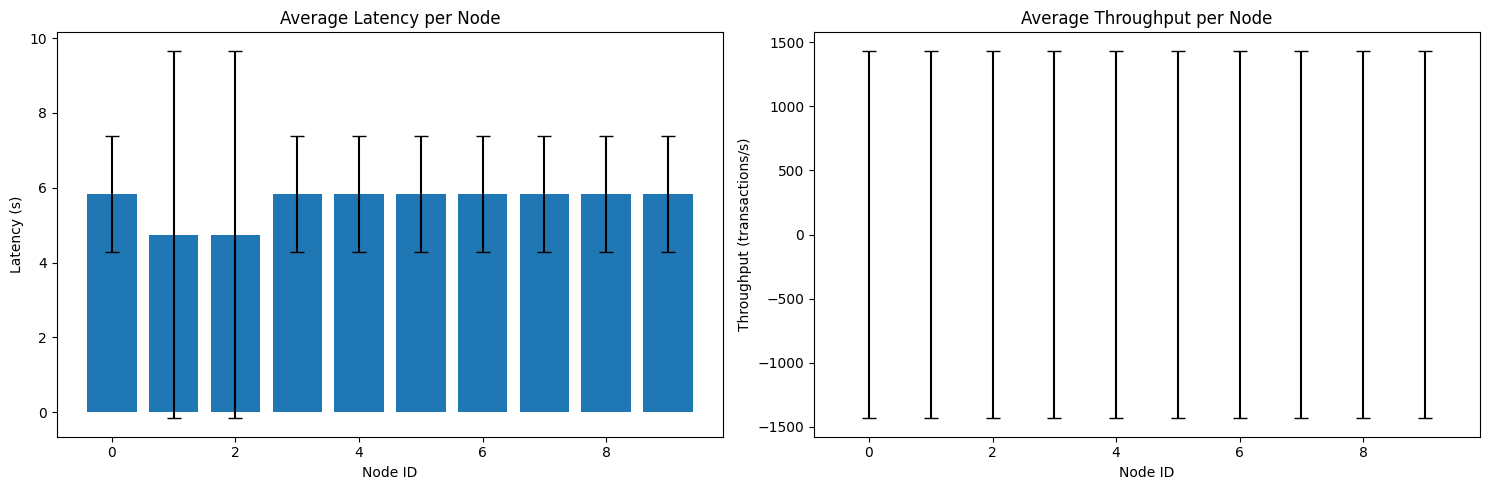

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 6, Validator: 0.6, Protocol: PBFT
Simulation started...


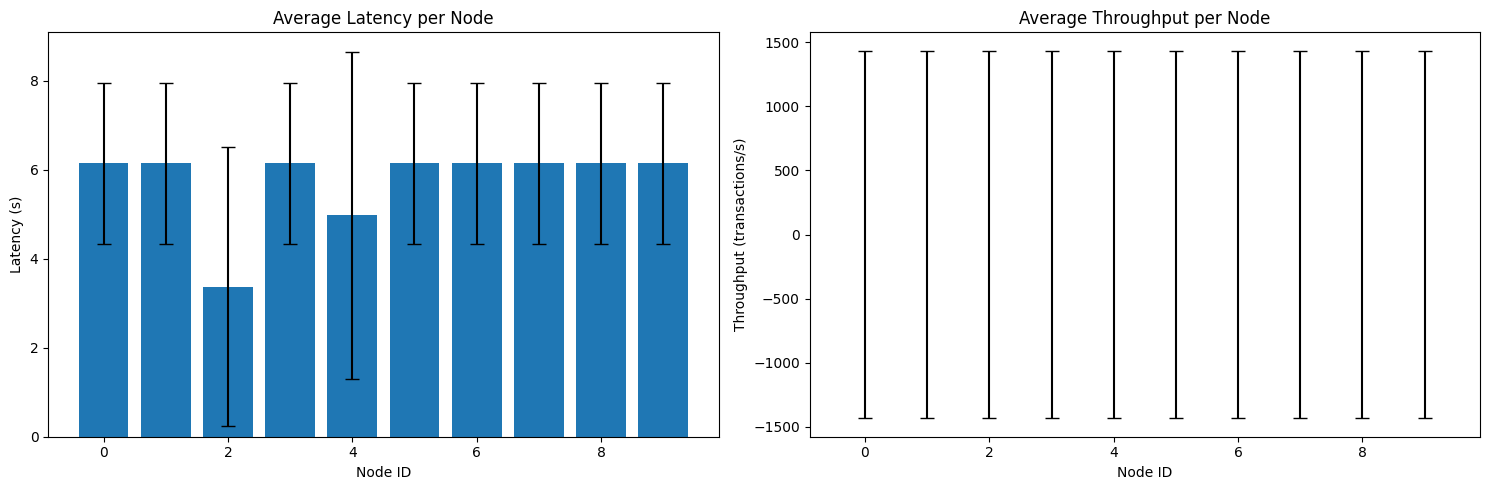

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 6, Validator: 0.6, Protocol: BigFoot
Simulation started...


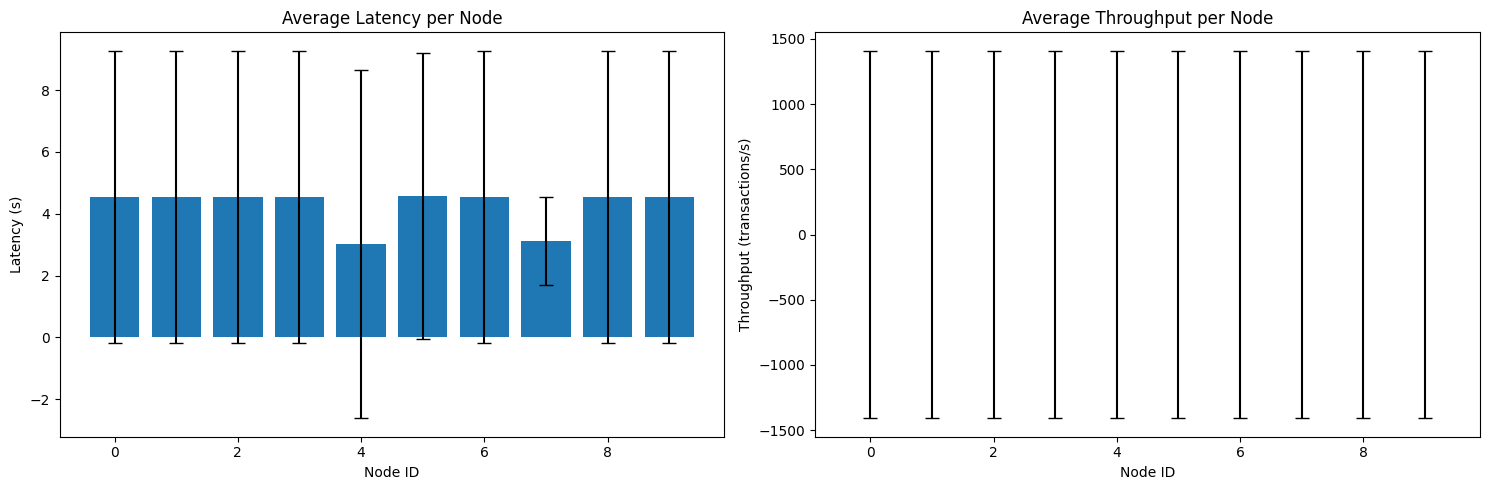

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 6, Validator: 0.6, Protocol: BigFoot
Simulation started...


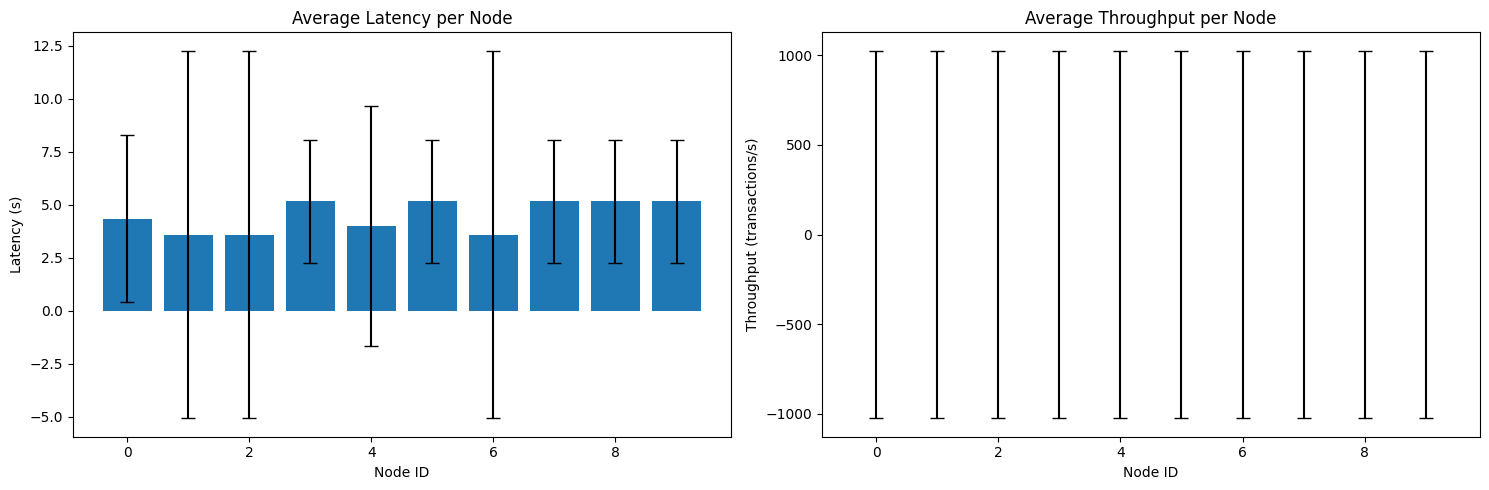

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 6, Validator: 0.6, Protocol: BigFoot
Simulation started...


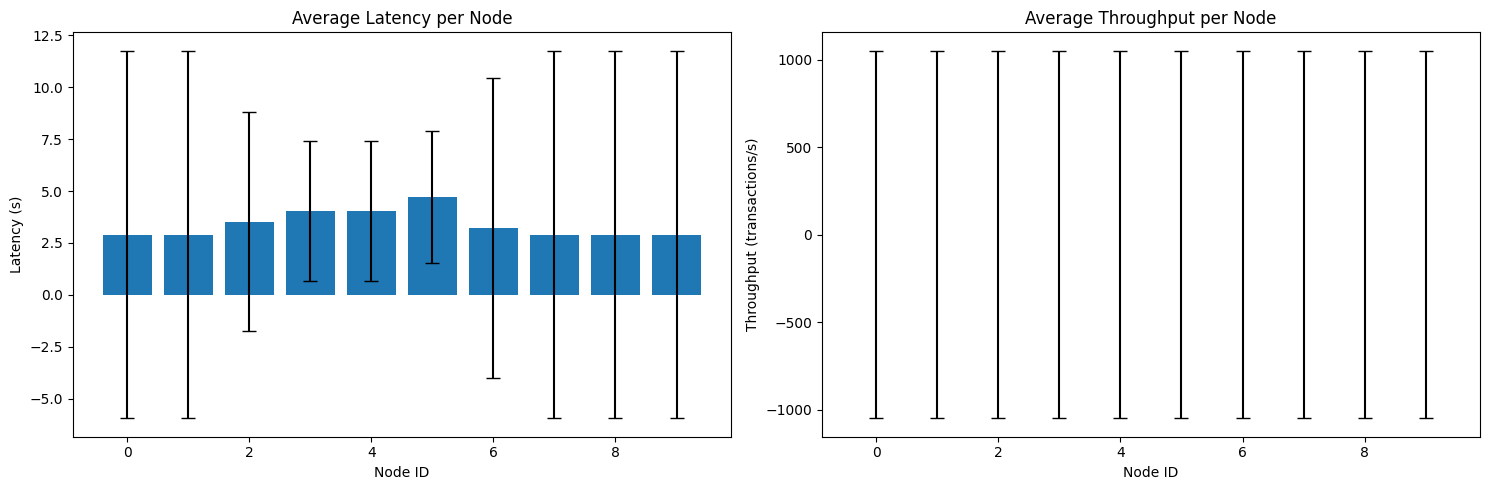

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 6, Validator: 0.9, Protocol: PBFT
Simulation started...


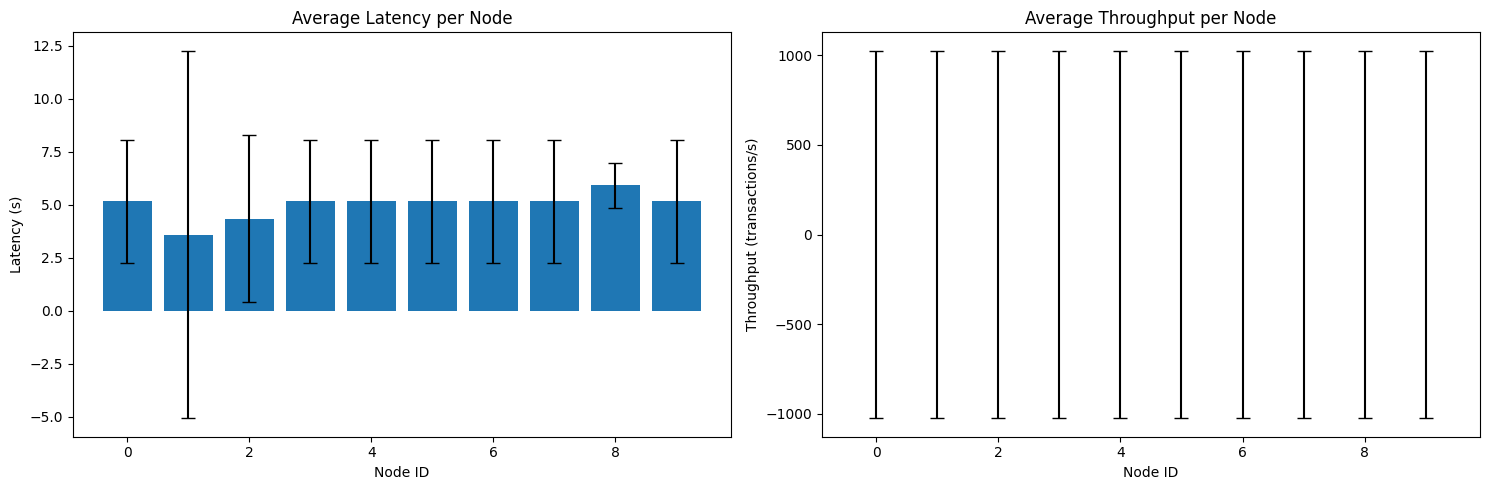

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 6, Validator: 0.9, Protocol: PBFT
Simulation started...


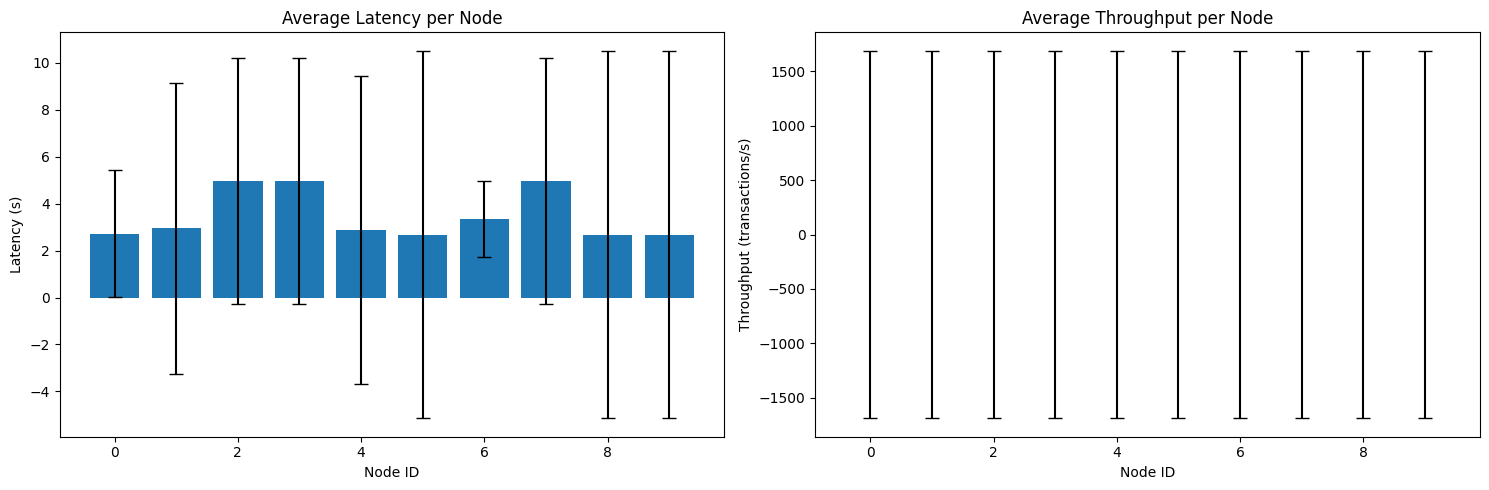

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 4000, Node: 6, Validator: 0.9, Protocol: PBFT
Simulation started...


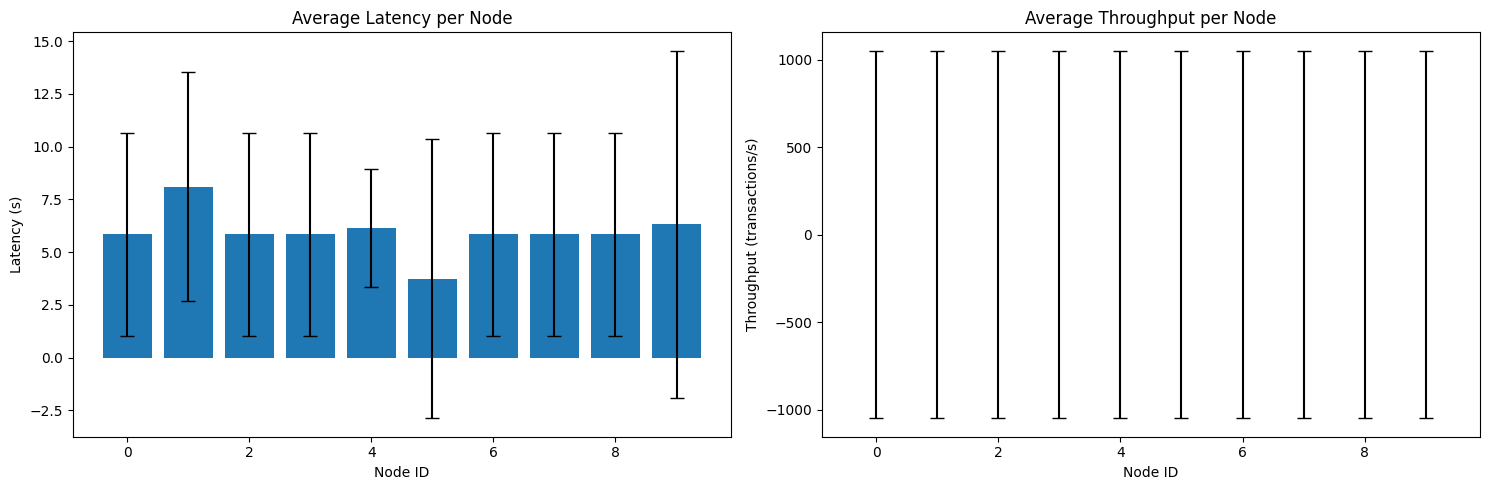

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 2000, Node: 6, Validator: 0.9, Protocol: BigFoot
Simulation started...


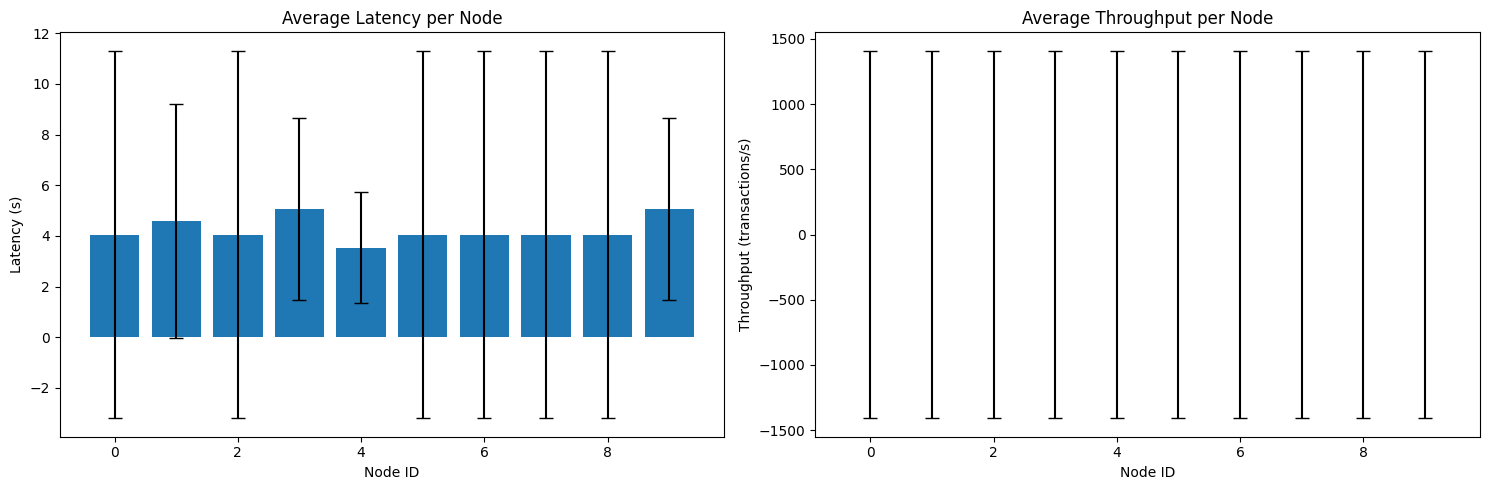

Simulation finished.
Writing report...
Report written to simulation_report.txt
Runtime: 3000, Node: 6, Validator: 0.9, Protocol: BigFoot
Simulation started...


KeyboardInterrupt: 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Run the simulation with different parameters and collect the results
results = []
for Node in [3,6, 9]:
    for Validator in [0.3,0.6,0.9]:
        for Protocol in ['PBFT', 'BigFoot']:
            for Runtime in [2000,3000,4000]:
                print(f"Runtime: {Runtime}, Node: {Node}, Validator: {Validator}, Protocol: {Protocol}")
                result = run1(Node, Validator, Protocol, Runtime)
                results.append(result)

# Convert the results to a DataFrame
df = pd.DataFrame(results)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot latency by Node and Protocol
sns.lineplot(data=df, x='Node', y='latency', hue='Protocol', ax=axs[0, 0])
axs[0, 0].set_title('Latency by Number of Nodes and Protocol')

# Plot throughput by Node and Protocol
sns.lineplot(data=df, x='Node', y='throughput', hue='Protocol', ax=axs[0, 1])
axs[0, 1].set_title('Throughput by Number of Nodes and Protocol')

# Plot blocktime by Node and Protocol
sns.lineplot(data=df, x='Node', y='blocktime', hue='Protocol', ax=axs[1, 0])
axs[1, 0].set_title('Block Time by Number of Nodes and Protocol')

# Plot decentralisation_nodes by Node and Protocol
sns.lineplot(data=df, x='Node', y='decentralisation_nodes', hue='Protocol', ax=axs[1, 1])
axs[1, 1].set_title('Decentralisation Nodes by Number of Nodes and Protocol')

plt.tight_layout()
plt.show()


In [1]:
import io
import sys
from datetime import datetime
from Chain.Manager import Manager
import random, numpy
import Chain.Consensus.BigFoot.BigFoot as BigFoot
import Chain.Consensus.PBFT.PBFT as PBFT
from Chain.Metrics import SimulationState, Metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Chain.Parameters import Parameters
import Chain.tools as tools


In [5]:

# Set the seed for random number generation
seed = 5
random.seed(seed)
np.random.seed(seed)

def run1(Node=10, Validator=0.1, Protocol='BigFoot',type="broadcast", beta=0.5,faulty_nodes=0,num_byzantine=0):
    """
    Runs the simulation with the given parameters.

    Parameters:
    Node (int): The number of nodes in the simulation.
    Validator (float): The probability of a node being a validator.
    Protocol (str): The consensus protocol to use ('BigFoot' or 'PBFT').
    Runtime (int): The runtime of the simulation in seconds.

    Returns:
    None
    """

    # Create a Manager object and set up the simulation
    manager = Manager()
    tools.set_env_vars_from_config()
    Parameters.load_params_from_config()
    # Use the modify method to set the parameters
    manager.modify('Nn', Node)
    manager.modify('alpha', Validator)
    manager.modify('init_CP', Protocol)
    manager.modify('beta', beta)
    manager.modify('type', type)
    manager.modify('simTime', 1000)
    manager.modify('crash_probs', faulty_nodes)
    manager.modify('byzantine_nodes', num_byzantine)
    manager.set_up()


    # Start the simulation and measure the runtime
    t = datetime.now()
    print("Simulation started...")
    manager.run()
    runtime = datetime.now() - t
    print("Simulation finished.")
    # Open a text file for writing the report

    SimulationState.store_state(manager.sim)
    Metrics.measure_all(SimulationState.blockchain_state)

    # Redirect stdout to a string buffer, print the metrics, and then reset stdout
    old_stdout = sys.stdout
    sys.stdout = buffer = io.StringIO()
    Metrics.print_metrics()
    sys.stdout = old_stdout
        # Get the metrics results
    metrics_result = Metrics.metrics_result()
    
    # Add the parameters to the metrics result dictionary
    metrics_result.update({
        "Node": Node,
        "Validator": Validator,
        "Protocol": Protocol,
        "Type": type1,
        "Beta": beta,
        "Faulty Nodes": faulty_nodes,
        "Num Byzantine": num_byzantine
    })

    return metrics_result

print("--------------------")    
# Run the simulation with different parameters and collect the results
results = []
for number_byzantine1 in [0,1]:
    for faulty_nodes1 in [0,1]:
       for type1 in ["broadcast","gossip"]:
            for Node1 in [6,9,12]:
                for Validator1 in [1]:
                    for Protocol1 in ['PBFT', 'BigFoot']:
                        for Runtime1 in [100]:
                            print(f"Running simulation with Node={Node1}, Validator={Validator1}, Protocol={Protocol1}, Runtime={Runtime1}, type={type1}, beta=0.5, faulty_nodes={faulty_nodes1}, num_byzantine={number_byzantine1}")
                            result = run1(Node=Node1, Validator=Validator1, Protocol=Protocol1,type=type1, beta=0.5,faulty_nodes=faulty_nodes1,num_byzantine=number_byzantine1)
                            results.append(result)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

def plot_simulation_results(df):
    # Parameters for the x-axis
    x_params = ['Node', 'Validator', 'Protocol', 'faulty_nodes', 'type']
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput']
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(len(y_metrics), len(x_params), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        for j, param in enumerate(x_params):
            sns.barplot(data=df, x=param, y=metric, ax=axs[i, j], capsize=.05)
            axs[i, j].set_title(f'{metric} over different {param}')
            axs[i, j].set_xlabel(param)
            axs[i, j].set_ylabel(metric)
            for item in axs[i, j].get_xticklabels():
                item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Convert the results to a DataFrame with appropriate columns
df = pd.DataFrame(results)
# Make sure to include all parameters and metrics in the DataFrame
expected_columns = ['Node', 'Validator', 'Protocol', 'Type', 'Beta', 'Faulty Nodes', 'Num Byzantine', 
                    'Average Latency', 'Latency Variance', 'Average Throughput', 'Throughput Variance']
assert all(column in df.columns for column in expected_columns), "DataFrame is missing expected columns"

# Call the function to plot the results
plot_simulation_results(df)


--------------------
Running simulation with Node=6, Validator=1, Protocol=PBFT, Runtime=100, type=broadcast, beta=0.5, faulty_nodes=0, num_byzantine=0
Simulation started...
Simulation finished.
Running simulation with Node=6, Validator=1, Protocol=BigFoot, Runtime=100, type=broadcast, beta=0.5, faulty_nodes=0, num_byzantine=0
Simulation started...
Simulation finished.
Running simulation with Node=9, Validator=1, Protocol=PBFT, Runtime=100, type=broadcast, beta=0.5, faulty_nodes=0, num_byzantine=0
Simulation started...
Simulation finished.
Running simulation with Node=9, Validator=1, Protocol=BigFoot, Runtime=100, type=broadcast, beta=0.5, faulty_nodes=0, num_byzantine=0
Simulation started...
Simulation finished.
Running simulation with Node=12, Validator=1, Protocol=PBFT, Runtime=100, type=broadcast, beta=0.5, faulty_nodes=0, num_byzantine=0
Simulation started...
Simulation finished.
Running simulation with Node=12, Validator=1, Protocol=BigFoot, Runtime=100, type=broadcast, beta=0.5,

ValueError: Sample larger than population or is negative

In [14]:
import seaborn as sns

ValueError: Could not interpret value `faulty_nodes` for `x`. An entry with this name does not appear in `data`.

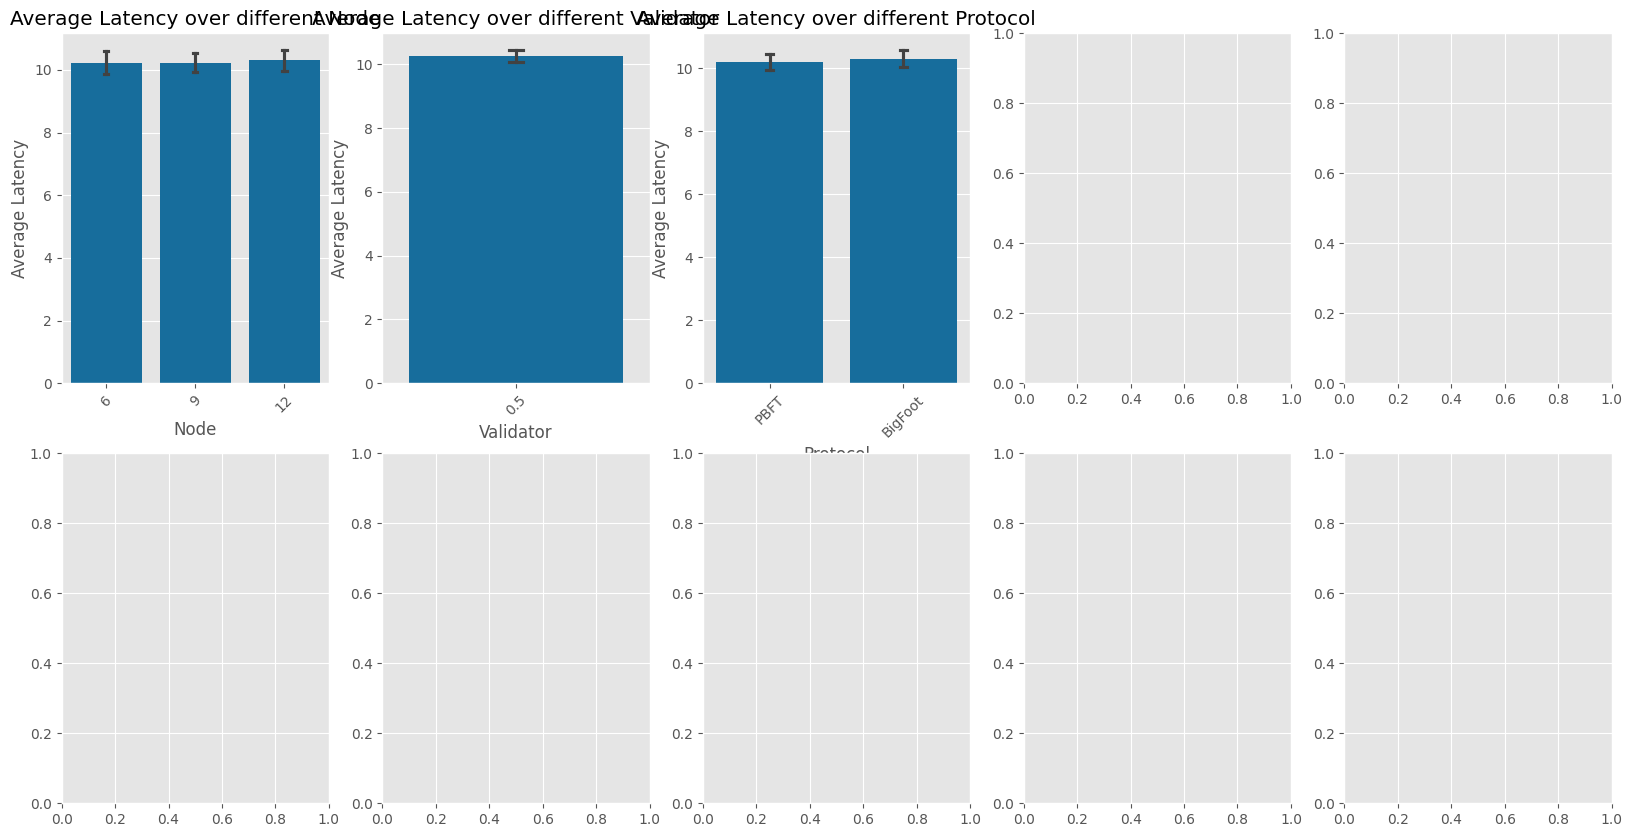

In [15]:
# Call the function to plot the results
plot_simulation_results(df)

In [1]:
import io
import sys
from datetime import datetime
from Chain.Manager import Manager
import random, numpy
import Chain.Consensus.BigFoot.BigFoot as BigFoot
import Chain.Consensus.PBFT.PBFT as PBFT
from Chain.Metrics import SimulationState, Metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Chain.Parameters import Parameters
import Chain.tools as tools
import seaborn as sns


In [2]:

# Set the seed for random number generation
seed = 5
random.seed(seed)
np.random.seed(seed)

def run1(Node=10, Validator=0.1, Protocol='BigFoot',type="broadcast", beta=0.5,faulty_nodes=0,num_byzantine=0):
    """
    Runs the simulation with the given parameters.

    Parameters:
    Node (int): The number of nodes in the simulation.
    Validator (float): The probability of a node being a validator.
    Protocol (str): The consensus protocol to use ('BigFoot' or 'PBFT').
    Runtime (int): The runtime of the simulation in seconds.

    Returns:
    None
    """

    # Create a Manager object and set up the simulation
    manager = Manager()
    tools.set_env_vars_from_config()
    Parameters.load_params_from_config()
    # Use the modify method to set the parameters
    manager.modify('Nn', Node)
    manager.modify('alpha', Validator)
    manager.modify('init_CP', Protocol)
    manager.modify('beta', beta)
    manager.modify('type', type)
    manager.modify('simTime', 1000)
    manager.modify('crash_probs', faulty_nodes)
    manager.modify('byzantine_nodes', num_byzantine)
    manager.set_up()


    # Start the simulation and measure the runtime
    t = datetime.now()
    print("Simulation started...")
    manager.run()
    runtime = datetime.now() - t
    print("Simulation finished.")
    # Open a text file for writing the report

    SimulationState.store_state(manager.sim)
    Metrics.measure_all(SimulationState.blockchain_state)
    Metrics.print_metrics(SimulationState.blockchain_state)
    # Redirect stdout to a string buffer, print the metrics, and then reset stdout
    old_stdout = sys.stdout
    sys.stdout = buffer = io.StringIO()
    Metrics.print_metrics()
    sys.stdout = old_stdout
        # Get the metrics results
    metrics_result = Metrics.metrics_result()
    
    # Add the parameters to the metrics result dictionary
    metrics_result.update({
        "Node": Node,
        "Validator": Validator,
        "Protocol": Protocol,
        "Type": type,
        "Beta": beta,
        "Faulty Nodes": faulty_nodes,
        "Num Byzantine": num_byzantine
    })

    return metrics_result

    
# Run the simulation with different parameters and collect the results
results = []
for number_byzantine in [0,1,2,3]:
    for faulty_nodes in [0,1,2,3]:
        for type in ["gossip", "broadcast","smallworld"]:
            for Node in [6,9,12]:
                for Validator in [0.5]:
                    for Protocol in ['PBFT', 'BigFoot']:
                        for Runtime in [1000]:
                            result = run1(Node=Node, Validator=Validator, Protocol=Protocol,type=type, beta=0.5,faulty_nodes=faulty_nodes,num_byzantine=number_byzantine)
                            results.append(result)

# Convert the results to a DataFrame
df = pd.DataFrame(results)

def plot_simulation_results(df):
    # Parameters for the x-axis
    x_params = ['Node', 'Validator', 'Protocol', 'faulty_nodes', 'type']
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput']
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(len(y_metrics), len(x_params), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        for j, param in enumerate(x_params):
            sns.barplot(data=df, x=param, y=metric, ax=axs[i, j], capsize=.05)
            axs[i, j].set_title(f'{metric} over different {param}')
            axs[i, j].set_xlabel(param)
            axs[i, j].set_ylabel(metric)
            for item in axs[i, j].get_xticklabels():
                item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Convert the results to a DataFrame with appropriate columns
df = pd.DataFrame(results)
# Make sure to include all parameters and metrics in the DataFrame
expected_columns = ['Node', 'Validator', 'Protocol', 'Type', 'Beta', 'Faulty Nodes', 'Num Byzantine', 
                    'Average Latency', 'Latency Variance', 'Average Throughput', 'Throughput Variance']
assert all(column in df.columns for column in expected_columns), "DataFrame is missing expected columns"

# Call the function to plot the results
plot_simulation_results(df)

# def plot_simulation_results(df):
#     # Set a larger figure size for readability
#     plt.figure(figsize=(20, 10))

#     # Define the metrics to plot
#     metrics_to_plot = ['Average Latency', 'Latency Variance', 'Average Throughput', 'Throughput Variance']

#     # Create a subplot for each metric
#     for i, metric in enumerate(metrics_to_plot, 1):
#         plt.subplot(2, 2, i)  # 2x2 grid, position i
#         plt.bar(df.index, df[metric], yerr=df.get(metric + ' Variance', 0), capsize=5)
#         plt.title(metric)
#         plt.xlabel('Simulation Run')
#         plt.ylabel(metric.split()[1])
#         plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
    
#     # Adjust layout and show the plot
#     plt.tight_layout()
#     plt.show()

# # Call the function to plot the results
# plot_simulation_results(df)




Simulation started...
Simulation finished.


StatisticsError: mean requires at least one data point